In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [185]:
data=pd.read_csv("supply_chain_data.csv")

In [3]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
data.shape

(100, 24)

In [6]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [8]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [10]:
data.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

# Data Cleaning

## Missing Value

In [20]:
missing_values=data.isnull().any(axis=0)
print("Columns with Missing Value")
missing_values

Columns with Missing Value


Product type               False
SKU                        False
Price                      False
Availability               False
Number of products sold    False
Revenue generated          False
Customer demographics      False
Stock levels               False
Lead times                 False
Order quantities           False
Shipping times             False
Shipping carriers          False
Shipping costs             False
Supplier name              False
Location                   False
Lead time                  False
Production volumes         False
Manufacturing lead time    False
Manufacturing costs        False
Inspection results         False
Defect rates               False
Transportation modes       False
Routes                     False
Costs                      False
dtype: bool

In [21]:
missing_values=data.isnull().any(axis=1)
print("Rows with Missing Value")
missing_values

Rows with Missing Value


0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [27]:
# data.dropna(inplace=True)

## Duplicate Value

In [28]:
data[data.duplicated()].count()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [ ]:
# data.drop_duplicates(inplace=True)

## Analyze and Visualize

### Quality Control - Defect Rate / Product

In [31]:
defect_rate_product=data.groupby("Product type")["Defect rates"].mean()

In [33]:
print("Defect Rates By Product Type")
defect_rate_product

Defect Rates By Product Type


Product type
cosmetics    1.919287
haircare     2.483150
skincare     2.334681
Name: Defect rates, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'cosmetics'), Text(1, 0, 'haircare'), Text(2, 0, 'skincare')])

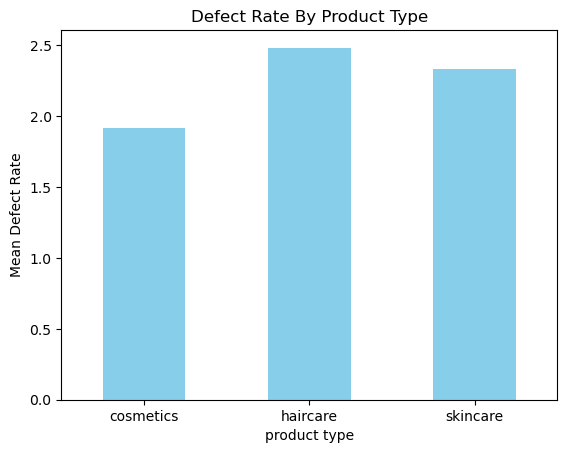

In [44]:
defect_rate_product.plot(kind="bar",color="skyblue")
plt.title("Defect Rate By Product Type")
plt.xlabel('product type')
plt.ylabel("Mean Defect Rate")
plt.xticks(rotation=0)

### Risk Assesment

In [46]:
selected_column=["SKU","Lead times","Stock levels"]
selected_column

['SKU', 'Lead times', 'Stock levels']

In [50]:
riskdata=data[selected_column]
riskdata

,SKU,Lead times,Stock levels
0,SKU0,7,58
1,SKU1,30,53
2,SKU2,10,1
3,SKU3,13,23
4,SKU4,3,5
...,...,...,...
95,SKU95,14,15
96,SKU96,2,67
97,SKU97,19,46
98,SKU98,1,53


In [51]:
riskdata["Risk Score"]=riskdata["Lead times"]*(1-riskdata["Stock levels"])

C:\Users\haric\AppData\Local\Temp\ipykernel_13144\3465419835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riskdata["Risk Score"]=riskdata["Lead times"]*(1-riskdata["Stock levels"])


In [55]:
risk_data=riskdata.sort_values(by="Risk Score",ascending=False)

In [57]:
print("Top 15 High Risk Stock Keeping Unit")
risk_data.head(15)

Top 15 High Risk Stock Keeping Unit


,SKU,Lead times,Stock levels,Risk Score
68,SKU68,8,0,8
2,SKU2,10,1,0
34,SKU34,26,1,0
16,SKU16,5,2,-5
4,SKU4,3,5,-12
78,SKU78,4,5,-16
87,SKU87,7,5,-28
76,SKU76,1,38,-37
8,SKU8,10,5,-40
47,SKU47,15,4,-45


### Inventory Optimization using EOQ(Economic Order Quantity)

### Economic Order Quantity (EOQ) Formula

The EOQ formula is used to calculate the optimal order quantity that minimizes the total inventory costs, which include ordering costs and holding costs. The formula is given by:

EOQ = √(2DS / H)

where:
- \( D \) = Annual demand (units per year)
- \( S \) = Ordering cost per order (cost per order)
- \( H \) = Holding cost per unit per year (cost per unit per year)

### Explanation:
- **Demand (D)**: The total quantity of units required per year.
- **Ordering Cost (S)**: The cost associated with placing a single order, which may include administrative costs, shipping, and handling.
- **Holding Cost (H)**: The cost to keep one unit of inventory in storage for a year, including warehousing costs, insurance, and opportunity costs.

### Example:
If a company has an annual demand (D) of 1000 units, an ordering cost (S) of $50 per order, and a holding cost (H) of $2 per unit per year, the EOQ is calculated as follows:

EOQ = √(2 × 1000 × 50 / 2) = √(50000) ≈ 223.61

This means the optimal order quantity is approximately 224 units per order to minimize total inventory costs.


In [61]:
holding_cost=0.2

In [84]:
def calculate_eoq(data):
    d=data["Number of products sold"]
    s=data["Costs"]
    h=data["Number of products sold"]*holding_cost
    EOQ=np.sqrt((2*s*d)/h)
    return EOQ
    
    

In [85]:
data["EOQ"]=calculate_eoq(data)

In [86]:
data["Current Order Quantity"]=data["Order quantities"]

In [87]:
comparison_column=["SKU","EOQ","Current Order Quantity"]
data[comparison_column]

,SKU,EOQ,Current Order Quantity
0,SKU0,43.330368,96
1,SKU1,70.927116,37
2,SKU2,37.672308,88
3,SKU3,50.475356,59
4,SKU4,96.095818,56
...,...,...,...
95,SKU95,88.253286,26
96,SKU96,43.444464,32
97,SKU97,73.493702,4
98,SKU98,93.925442,27


### Customer Segmentation 

In [91]:
meanrevenue=data.groupby(["Customer demographics","Product type"])[("Revenue generated")].mean().reset_index()

In [92]:
totalrevenue=data.groupby(["Customer demographics","Product type"])[("Revenue generated")].sum().reset_index()

In [93]:
print("Mean Revenue of Each Customer")
print(meanrevenue)



print("Sum Revenue of Each Customer")
print(totalrevenue)

Mean Revenue of Each Customer
   Customer demographics Product type  Revenue generated
0                 Female    cosmetics        6954.854220
1                 Female     haircare        6362.416642
2                 Female     skincare        6095.470280
3                   Male    cosmetics        5347.741374
4                   Male     haircare        5059.992731
5                   Male     skincare        7806.214493
6             Non-binary    cosmetics        5247.096332
7             Non-binary     haircare        5567.306726
8             Non-binary     skincare        4650.833889
9                Unknown    cosmetics        6335.182378
10               Unknown     haircare        4810.632195
11               Unknown     skincare        6287.152696
Sum Revenue of Each Customer
   Customer demographics Product type  Revenue generated
0                 Female    cosmetics       69548.542197
1                 Female     haircare       12724.833283
2                 Female     

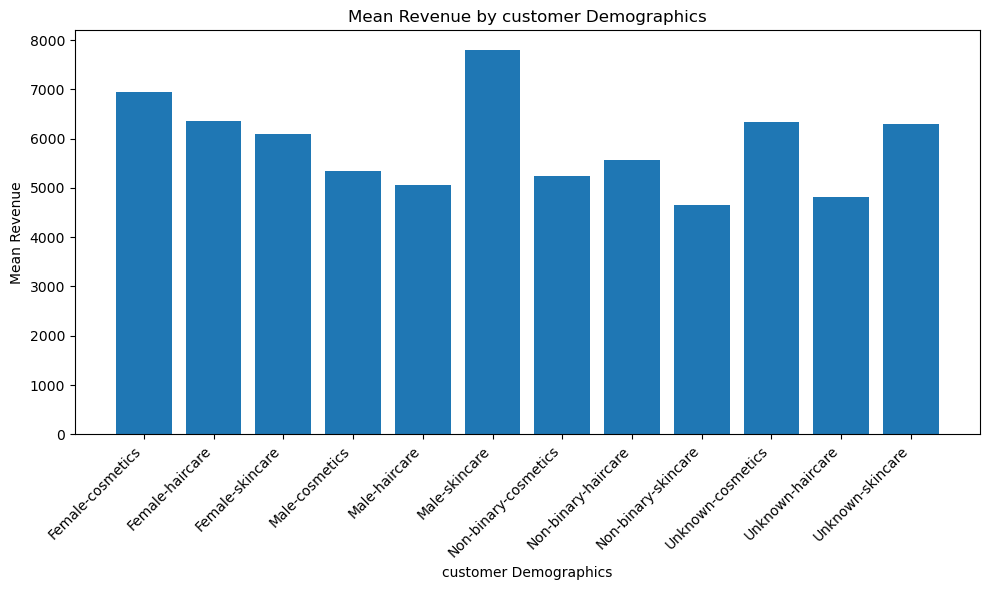

In [105]:
plt.figure(figsize=(10,6))
plt.bar(meanrevenue["Customer demographics"]+ "-"+meanrevenue["Product type"],meanrevenue["Revenue generated"])

plt.xlabel("customer Demographics")
plt.ylabel("Mean Revenue")
plt.title("Mean Revenue by customer Demographics")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()

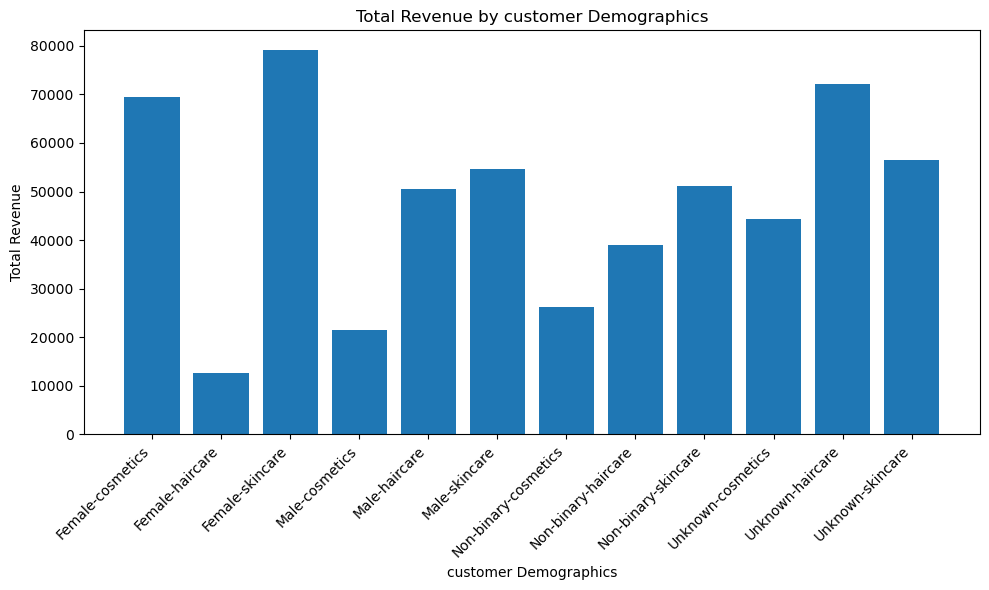

In [107]:
plt.figure(figsize=(10,6))
plt.bar(totalrevenue["Customer demographics"]+ "-"+totalrevenue["Product type"],totalrevenue["Revenue generated"])

plt.xlabel("customer Demographics")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by customer Demographics")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()

### Lead Time Optimization

In [109]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs', 'Current Order Quantity',
       'EOQ'],
      dtype='object')

In [110]:
leadtime_column="Lead times"
transport_modes="Transportation modes"
routes_column="Routes"

In [111]:
average_lead_time_mode=data.groupby(transport_modes)[leadtime_column].mean().reset_index()

In [118]:
print("Average Lead Transportation Mode")
average_lead_time_mode

Average Lead Transportation Mode


,Transportation modes,Lead times
0,Air,18.269231
1,Rail,14.892857
2,Road,17.137931
3,Sea,12.176471


In [123]:
besttransportation=average_lead_time_mode.loc[average_lead_time_mode[leadtime_column].idxmin()]

In [126]:
print("Best Transportation Mode")
besttransportation

Best Transportation Mode


Transportation modes          Sea
Lead times              12.176471
Name: 3, dtype: object

### ForeCast Demand with LightGBM

In [133]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 2.6 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.4 MB 4.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 6.1 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.6 MB/s eta 0:00:00


In [134]:
import lightgbm as lgb

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
target_column="Number of products sold"
features=["Price","Availability","Stock levels","Lead times","Order quantities"]

In [141]:
xtrain,xtest,ytrain,ytest=train_test_split(data[features],data[target_column],test_size=0.2,random_state=42)

In [143]:
train_data=lgb.Dataset(xtrain,label=ytrain)

In [146]:
params={
    'objective':"regression",
    'boosting_type':"gbdt",
    'metric':"mse",
    'num_leaves':31,
    'learning_rate':0.05,
    'feature_fraction':0.9
}

In [147]:
num_round=100
bst=lgb.train(params,train_data)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 5
[LightGBM] [Info] Start training from score 453.200000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [148]:
y_pred=bst.predict(xtest,num_iteration=bst.best_iteration)

In [149]:
y_pred

array([602.26477999, 462.50809993, 470.25702294, 382.77090386,
       325.46704061, 413.25164768, 375.62754257, 557.18903774,
       332.66809798, 444.34647958, 346.02050077, 409.1354491 ,
       497.41937115, 360.4174601 , 336.97107195, 346.89585609,
       442.85618876, 354.04827904, 570.12310461, 269.46575199])

In [150]:
print("Forecasted Customer Demand")
y_pred

Forecasted Customer Demand


array([602.26477999, 462.50809993, 470.25702294, 382.77090386,
       325.46704061, 413.25164768, 375.62754257, 557.18903774,
       332.66809798, 444.34647958, 346.02050077, 409.1354491 ,
       497.41937115, 360.4174601 , 336.97107195, 346.89585609,
       442.85618876, 354.04827904, 570.12310461, 269.46575199])

### Cost Optimization with RNN

In [151]:
!pip install tensorflow

In [152]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [186]:

target_column = "Manufacturing costs"
feature_column = "Production volumes"

X = data[feature_column].values.reshape(-1,1)
y = data[target_column].values

scaler = MinMaxScaler()
X_scaled = scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(data[feature_column], data[target_column], test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_dim=1),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss='mean_squared_error')

print("X shape:", X.shape)
print("y shape:", y.shape)

min_production_volume = data["Order quantities"].min()
max_production_volume = 1000
step_size = 10

cheapest_cost = float("inf")
best_production_volume = None

for production_volume in range(min_production_volume,max_production_volume + 1, step_size):
  normalized_production_volume = scaler.transform(np.array([[production_volume]]))
  predicted_cost = model.predict(normalized_production_volume)
  if production_volume == best_production_volume:
      best_cost = predicted_cost[0][0]
  if predicted_cost[0][0] >= 0:
      cheapest_cost = predicted_cost[0][0]
      best_production_volume = production_volume
print("Most Optimal Production Volume to Minimize Manifacturing Cost:",best_production_volume)
print("The Cheapest Manifacturing Cost",cheapest_cost)

X shape: (100, 1)
y shape: (100,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

c:\Users\haric\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━